# S4E3 Steel Plate Defects Prediction EDA
* Initial EDA
* Baseline model = Logistic Regression with one vs. rest classifier
    * No scaling


In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scienceplots
plt.style.use(['science'])

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

# increase display columns
pd.set_option('display.max_columns', 50)


## Load Data

In [146]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
ss = pd.read_csv('./sample_submission.csv')


## Data Overview

In [147]:
print(f'Shape of train data: {train.shape}')
display(train.head())
print(f'Shape of test data: {test.shape}')
display(test.head())
print(f'Shape of sample submission: {ss.shape}')
display(ss.head())


Shape of train data: (19219, 35)


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


Shape of test data: (12814, 28)


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


Shape of sample submission: (12814, 8)


,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [148]:
display(train.describe())
display(test.describe())

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,12814.000000,12814.000000,12814.000000,1.281400e+04,1.281400e+04,12814.000000,12814.000000,12814.000000,1.281400e+04,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000
mean,25625.500000,709.331356,753.274934,1.846533e+06,1.842029e+06,1672.908225,96.459497,64.730607,1.926893e+05,84.548072,128.688856,1460.135633,0.405182,0.593882,75.868659,0.354008,0.408508,0.573603,0.030695,0.618650,0.833823,0.584985,2.472743,1.311689,1.388119,0.101164,-0.139516,0.572401
std,3699.227509,531.878508,500.743570,1.916427e+06,1.911426e+06,3725.518996,219.928548,188.506385,4.812871e+05,28.711574,14.280995,146.110873,0.490946,0.491126,53.487324,0.318958,0.124507,0.258261,0.048663,0.220361,0.220306,0.483308,0.761108,0.467621,0.401725,0.488127,0.117878,0.331974
min,19219.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,4.000000,2.000000,2.000000,5.350000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.009000,0.001500,0.014400,0.066700,0.000000,0.778200,0.344400,0.301000,-0.991000,-0.998900,0.119000
25%,22422.250000,46.000000,214.000000,6.401738e+05,6.398570e+05,91.000000,15.000000,14.000000,9.968000e+03,68.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.316200,0.375000,0.006600,0.455075,0.666700,0.000000,1.959000,1.000000,1.079200,-0.277800,-0.192600,0.257000
50%,25625.500000,776.000000,796.000000,1.378890e+06,1.378588e+06,169.000000,24.000000,24.000000,1.840200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.247400,0.412100,0.541700,0.009500,0.638700,0.967700,1.000000,2.227900,1.146100,1.322200,0.111100,-0.143900,0.472900
75%,28828.750000,1152.000000,1167.000000,2.368032e+06,2.356238e+06,649.000000,64.000000,60.000000,6.696025e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.654400,0.493800,0.818200,0.019075,0.785700,1.000000,1.000000,2.814125,1.431400,1.707600,0.529400,-0.084300,0.999200
max,32032.000000,1688.000000,1712.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1727.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.747200,1.000000,1.000000,1.000000,4.680200,2.938500,4.258700,0.973900,0.591700,1.000000


## Targets

In [149]:
targets = list(train.columns[-7:])
print(targets)

['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']


In [150]:
# do all targets sum to 1?
print(train[targets].sum(axis=1).value_counts())

1    18380
0      818
2       21
Name: count, dtype: int64


In [151]:
# make a targets dataframe of just the target columns
targets_df = train[targets]
targets_df.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


In [152]:
# remove the targets columns from train
train = train.drop(columns=targets)
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998


### Target Distributions

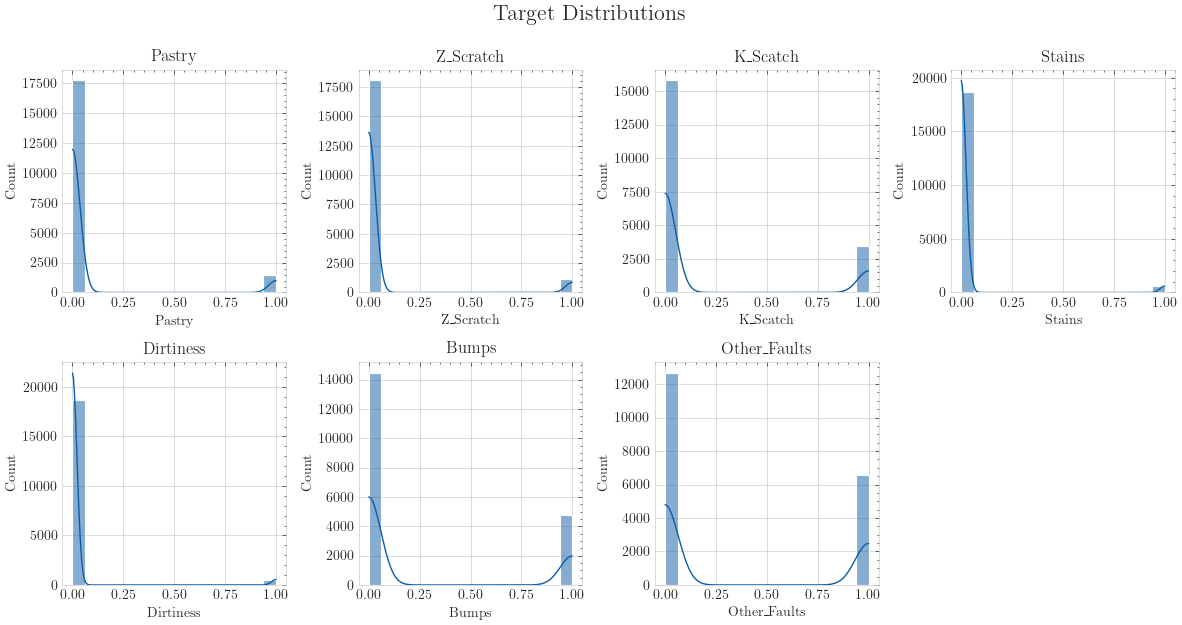

In [153]:
# plot the target distributions in a 2x4 grid
rows = 2
cols = 4
fig, ax = plt.subplots(rows,cols,figsize=(12,6))
for i in range(rows):
    for j in range(cols):
        idx = i*cols + j
        if idx < len(targets):
            sns.histplot(targets_df[targets[idx]], kde=True, ax=ax[i,j])
            ax[i,j].set_title(targets[idx])
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.suptitle('Target Distributions', y=1.05, fontsize=16)
plt.show()

* Imbalanced classes - use stratified kfold for cross validation

## Missing Values

In [154]:
def df_info(df):
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary['missing#'] = df.isna().sum()
    summary['missing%'] = (df.isna().sum())/len(df)
    summary['uniques'] = df.nunique().values
    summary['count'] = df.count().values
    return summary

df_info(train)

,dtypes,missing#,missing%,uniques,count
id,int64,0,0.0,19219,19219
X_Minimum,int64,0,0.0,1191,19219
X_Maximum,int64,0,0.0,1259,19219
Y_Minimum,int64,0,0.0,3345,19219
Y_Maximum,int64,0,0.0,3341,19219
Pixels_Areas,int64,0,0.0,1154,19219
X_Perimeter,int64,0,0.0,460,19219
Y_Perimeter,int64,0,0.0,331,19219
Sum_of_Luminosity,int64,0,0.0,2595,19219
Minimum_of_Luminosity,int64,0,0.0,162,19219


In [155]:
# how many columns have less than 20 unique values?
df_info(train).query('uniques < 20')

,dtypes,missing#,missing%,uniques,count
TypeOfSteel_A300,int64,0,0.0,2,19219
TypeOfSteel_A400,int64,0,0.0,2,19219
Outside_Global_Index,float64,0,0.0,4,19219


<strong>Takeaways</strong>
* No missing values to impute
* All columns are numerical, mixed types of float and int
* 7 targets to predict
* a few columns have less than 20 unique values which could be categorical or boolean
    * TypeOfSteel_A300, TypeOfSteel_A400 are binary
    * Outside_Global_Index has 4 unique values

In [156]:
train.Outside_Global_Index.value_counts()

Outside_Global_Index
1.0    11022
0.0     7490
0.5      706
0.7        1
Name: count, dtype: int64

* Outside_Global_Index looks oridinal, leave datatypes as is for now

## Distribution of Float Columns

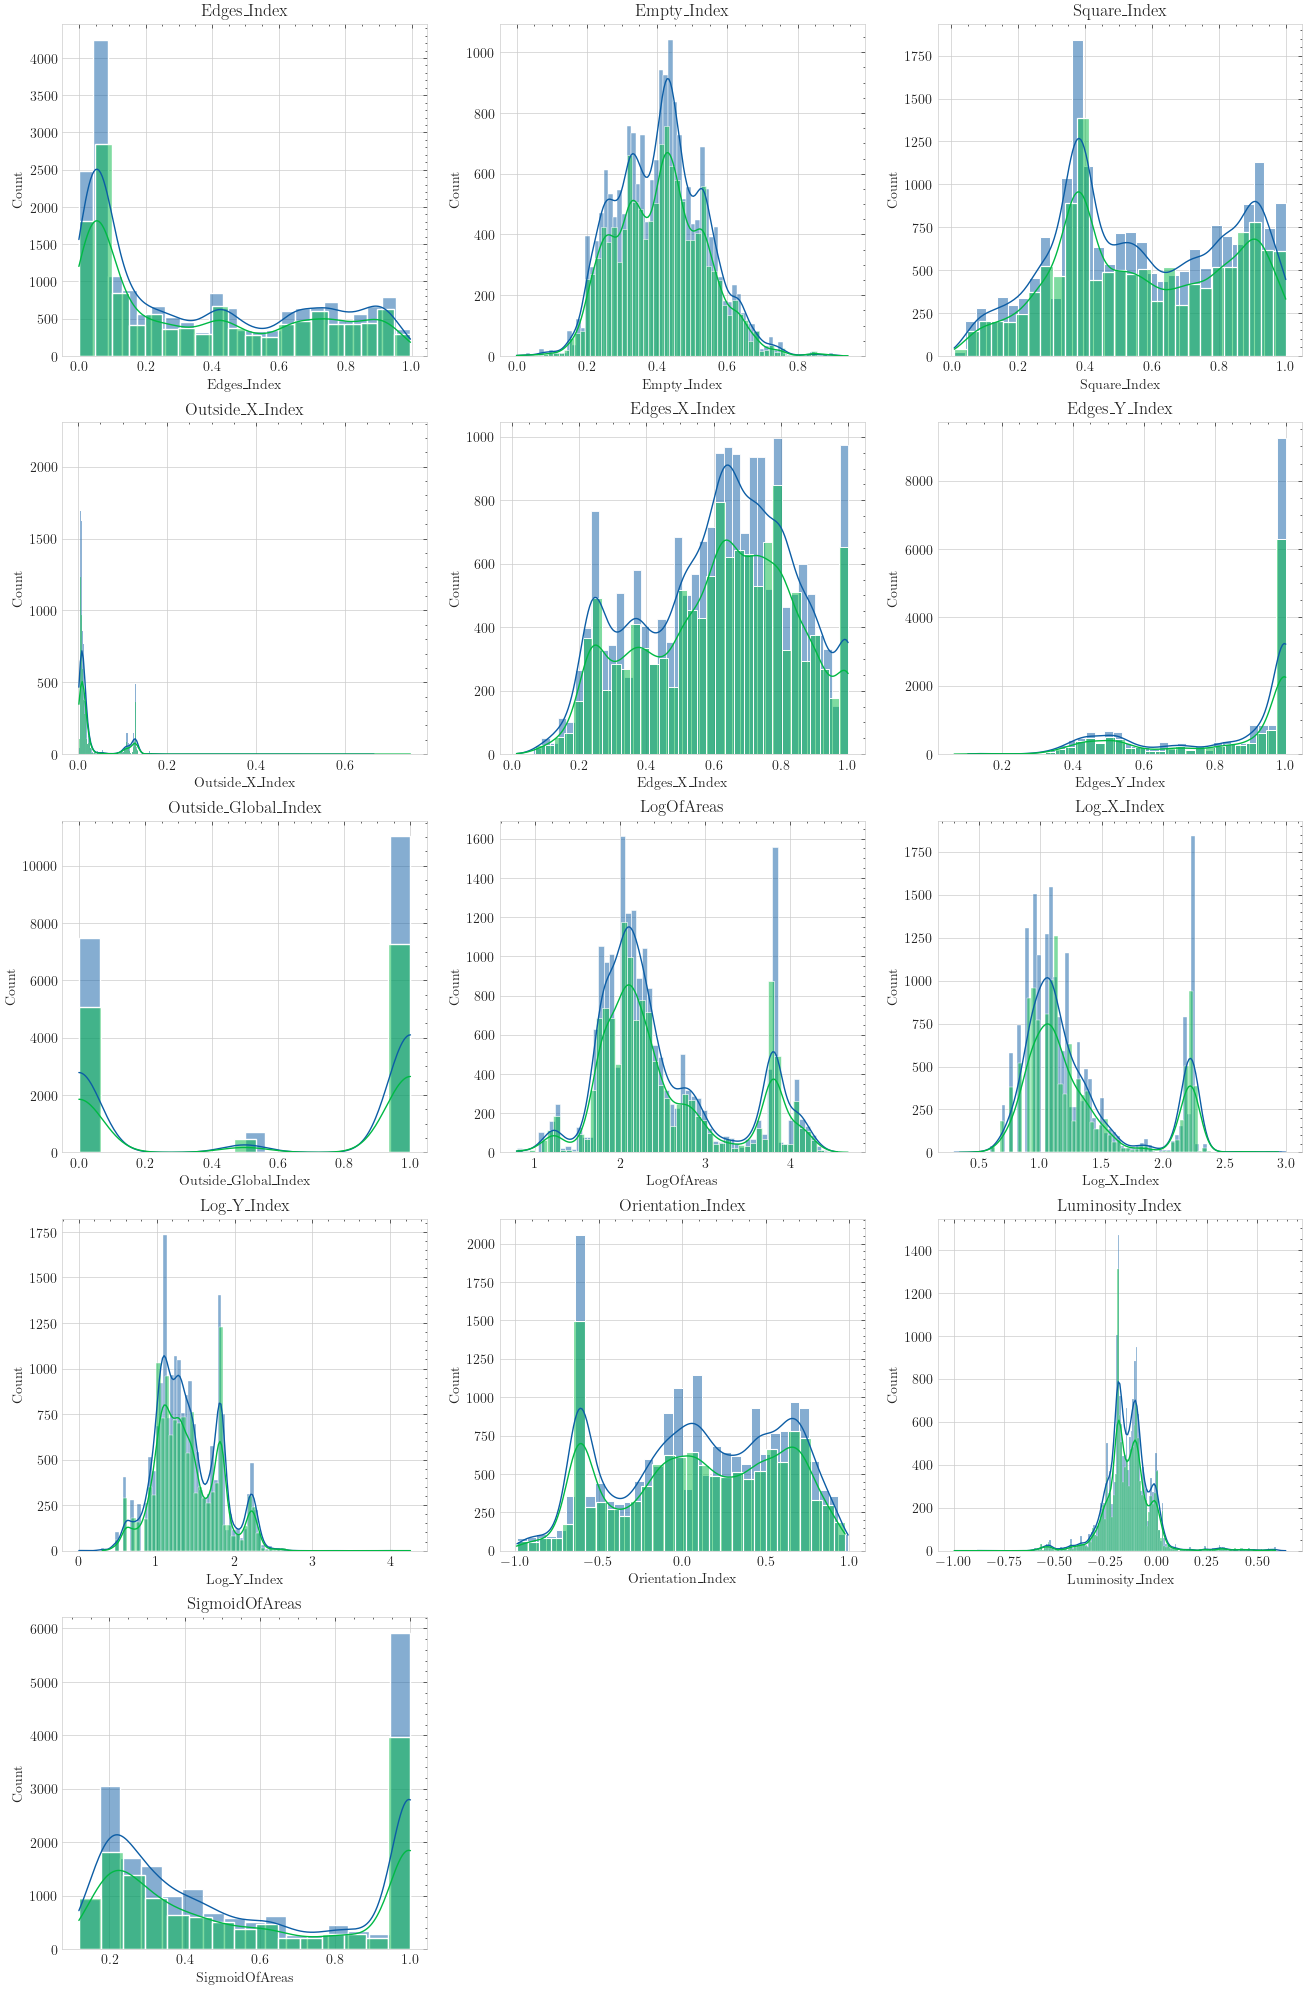

In [157]:
features = [col for col in train.columns if train[col].dtype=='float']
rows = int(np.ceil(len(features)/3))
plt.figure(figsize=(16,5*rows))
for i,col in enumerate(features):
    plt.subplot(rows,3,i+1)
    sns.histplot(train[col],kde=True)
    sns.histplot(test[col], kde=True)
    plt.title(col)

Some bimodal, some skewed, some normal, look into scaling and transform options
   * StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, etc.
    

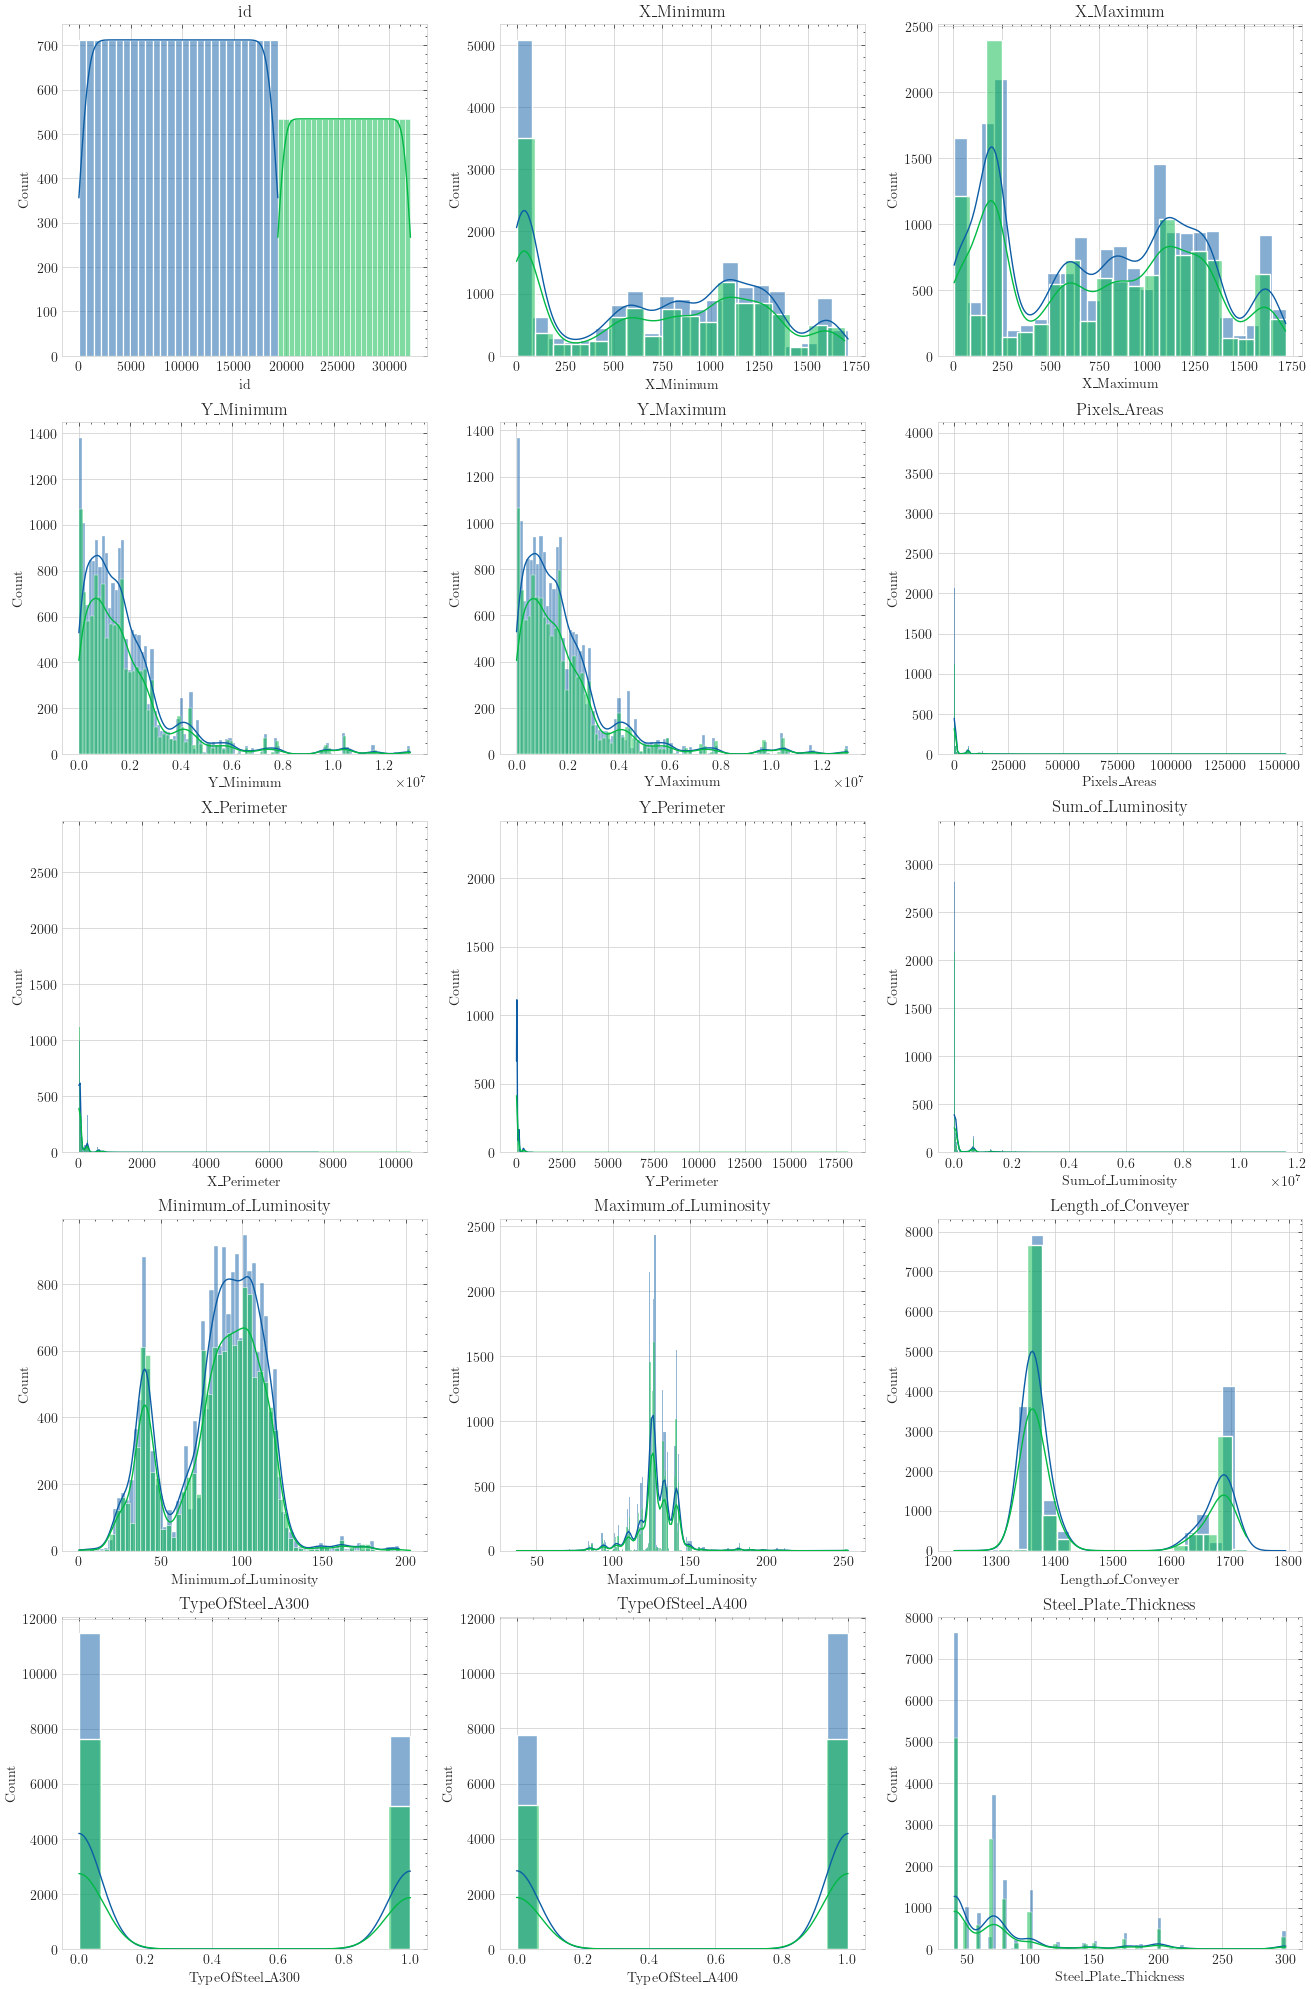

In [158]:
features = [col for col in train.columns if train[col].dtype=='int']
rows = int(np.ceil(len(features)/3))
plt.figure(figsize=(16,5*rows))
for i,col in enumerate(features):
    plt.subplot(rows,3,i+1)
    sns.histplot(train[col],kde=True)
    sns.histplot(test[col], kde=True)
    plt.title(col)

Some interesting distributions
* Max Luminosity looks like gaussians centered on discrete values 
* Others have clustered distributions, then large outliers
    * Investigate these further
      

## Correlations

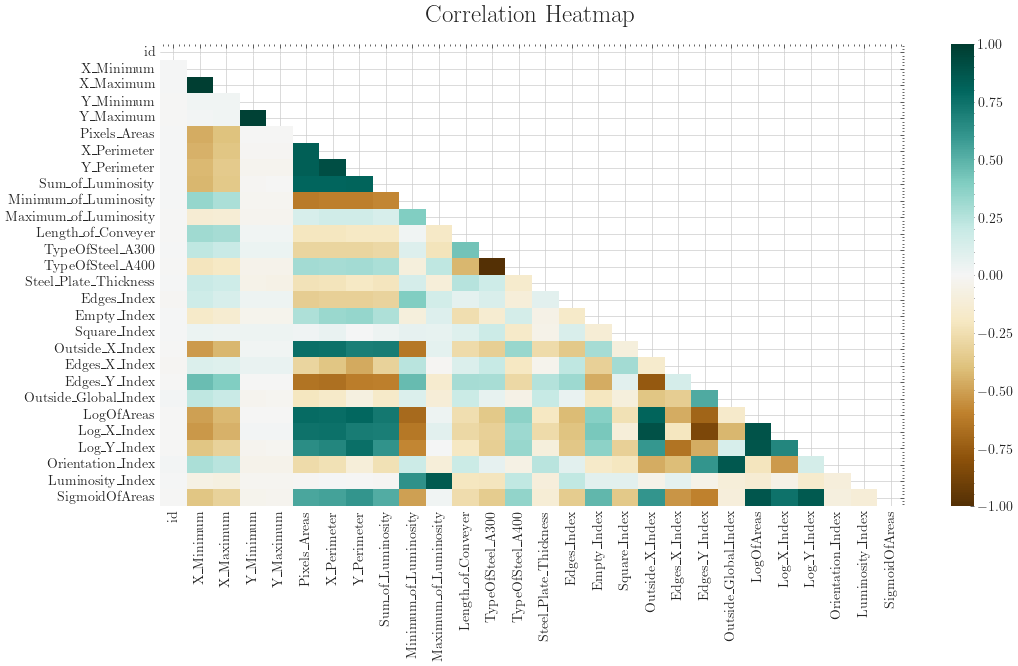

In [159]:
plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(train.corr(),dtype=bool))
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

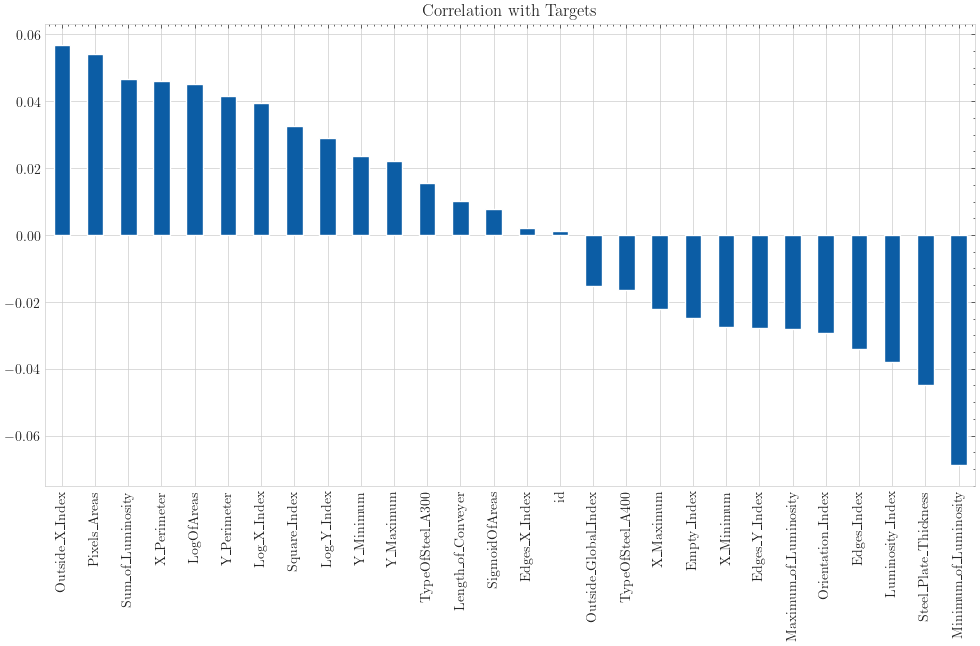

In [160]:
# look at correlations with the targets
corr_with_targets = train.corrwith(targets_df.mean(axis=1))
corr_with_targets = corr_with_targets.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
corr_with_targets.plot(kind='bar')
plt.title('Correlation with Targets')
plt.show()


## Select Features

In [161]:
features = [col for col in test.columns if col not in ['Id']]
len(features)

28

# Split data into train and validation
* Start with simple split for baseline, go to cross validation later

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, targets_df, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((15375, 28), (3844, 28), (15375, 7), (3844, 7))

## Models

## Logistic Regression Baseline
* Start with no scaling

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# fit the model
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_val)

# evaluate with ROC AUC
print('Accuracy:', accuracy_score(y_val, y_pred))
print('F1:', f1_score(y_val, y_pred, average='weighted'))
print('Precision:', precision_score(y_val, y_pred, average='weighted'))
print('Recall:', recall_score(y_val, y_pred, average='weighted'))
print(classification_report(y_val, y_pred))
print('ROC AUC:', roc_auc_score(y_val, y_pred))


Accuracy: 0.20031217481789804
F1: 0.16911111628975173
Precision: 0.17868503040831332
Recall: 0.16352716352716354
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       301
           1       0.00      0.00      0.00       220
           2       0.89      0.85      0.87       682
           3       0.49      0.18      0.26       100
           4       0.00      0.00      0.00        85
           5       0.00      0.00      0.00       926
           6       0.00      0.00      0.00      1349

   micro avg       0.87      0.16      0.28      3663
   macro avg       0.20      0.15      0.16      3663
weighted avg       0.18      0.16      0.17      3663
 samples avg       0.16      0.16      0.16      3663

ROC AUC: 0.5716960512868957


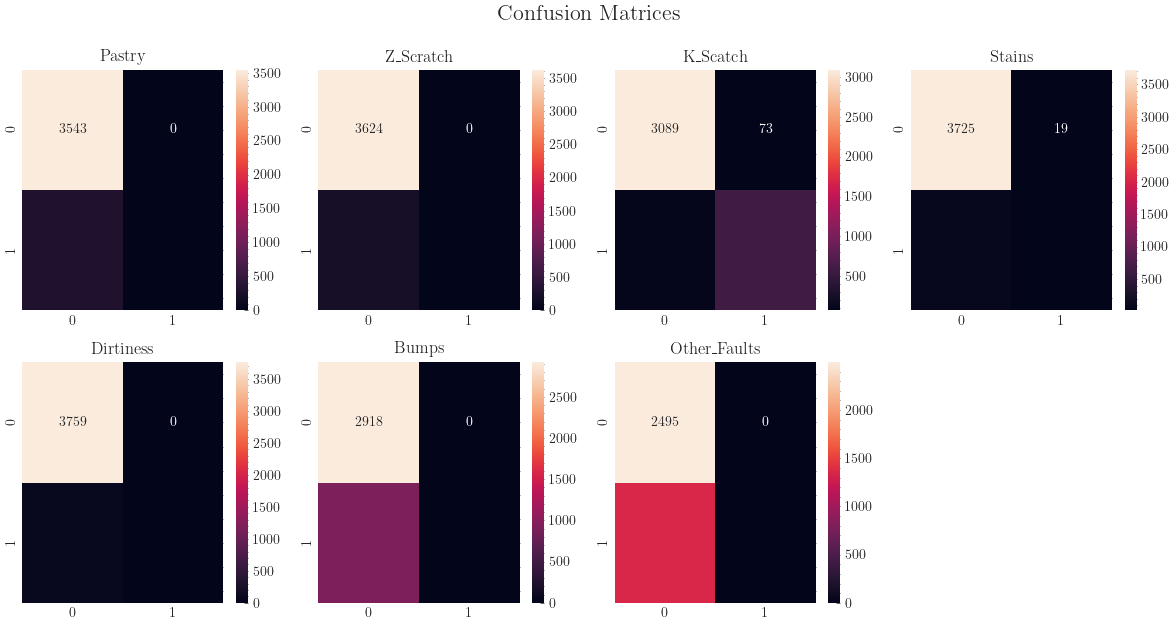

In [164]:
# plot confusion matrix
fig, ax = plt.subplots(2,4,figsize=(12,6))
for i in range(2):
    for j in range(4):
        idx = i*4 + j
        if idx < len(targets):
            sns.heatmap(confusion_matrix(y_val.iloc[:,idx], y_pred[:,idx]), annot=True, fmt='d', ax=ax[i,j])
            ax[i,j].set_title(targets[idx])
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.suptitle('Confusion Matrices', y=1.05, fontsize=16)
plt.show()


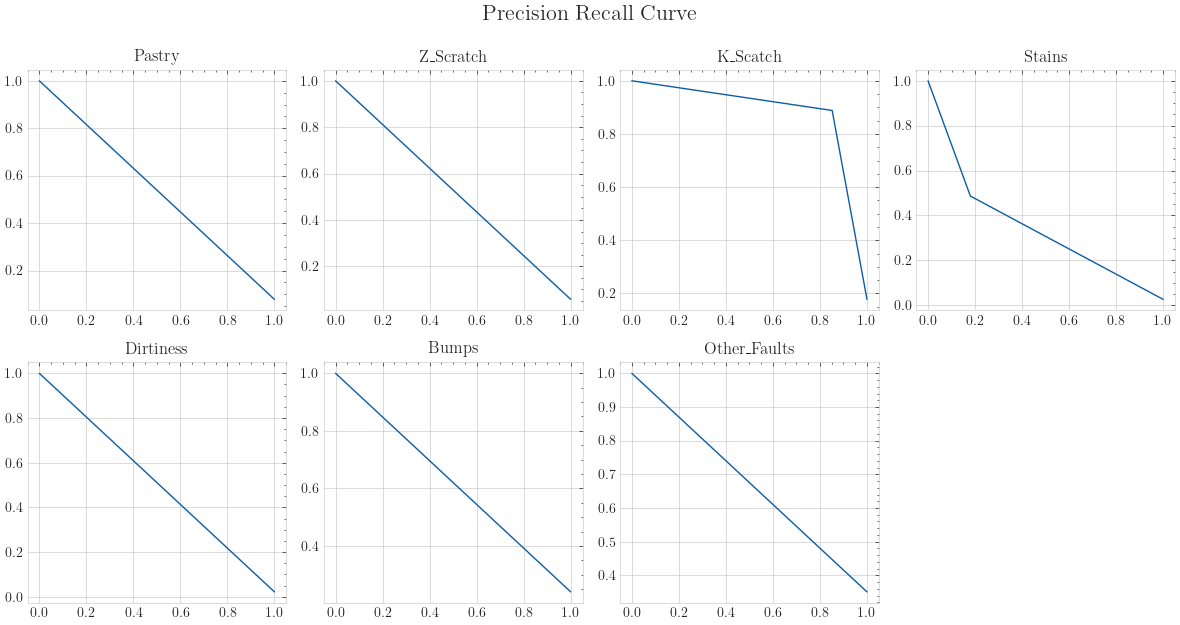

In [165]:
# plot precision recall curve
from sklearn.metrics import precision_recall_curve
fig, ax = plt.subplots(2,4,figsize=(12,6))
for i in range(2):
    for j in range(4):
        idx = i*4 + j
        if idx < len(targets):
            precision, recall, thresholds = precision_recall_curve(y_val.iloc[:,idx], y_pred[:,idx])
            ax[i,j].plot(recall, precision)
            ax[i,j].set_title(targets[idx])
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.suptitle('Precision Recall Curve', y=1.05, fontsize=16)
plt.show()


## Predict with Probabilities
* Instead of 1/0

In [166]:
# predict probabilities
y_pred_proba = model.predict_proba(X_val)
y_pred_proba


array([[1.23674665e-01, 5.76861287e-02, 2.77842088e-02, ...,
        3.62574150e-02, 3.40090671e-01, 4.32073417e-01],
       [3.58130580e-02, 5.98838188e-02, 3.97503654e-01, ...,
        1.34173887e-02, 4.76951399e-02, 2.67303528e-01],
       [9.48643436e-02, 1.46017592e-02, 6.16991093e-03, ...,
        2.02074530e-02, 3.07736331e-01, 4.10073054e-01],
       ...,
       [1.08862310e-01, 4.18356465e-02, 2.58209228e-02, ...,
        4.18103145e-02, 3.65753553e-01, 3.91304843e-01],
       [7.19502696e-02, 2.65029868e-02, 1.56855492e-02, ...,
        2.26470833e-02, 2.83184824e-01, 3.55251631e-01],
       [2.46826438e-03, 2.24165967e-03, 9.86842023e-01, ...,
        1.64511045e-03, 1.67855883e-04, 5.80913140e-02]])

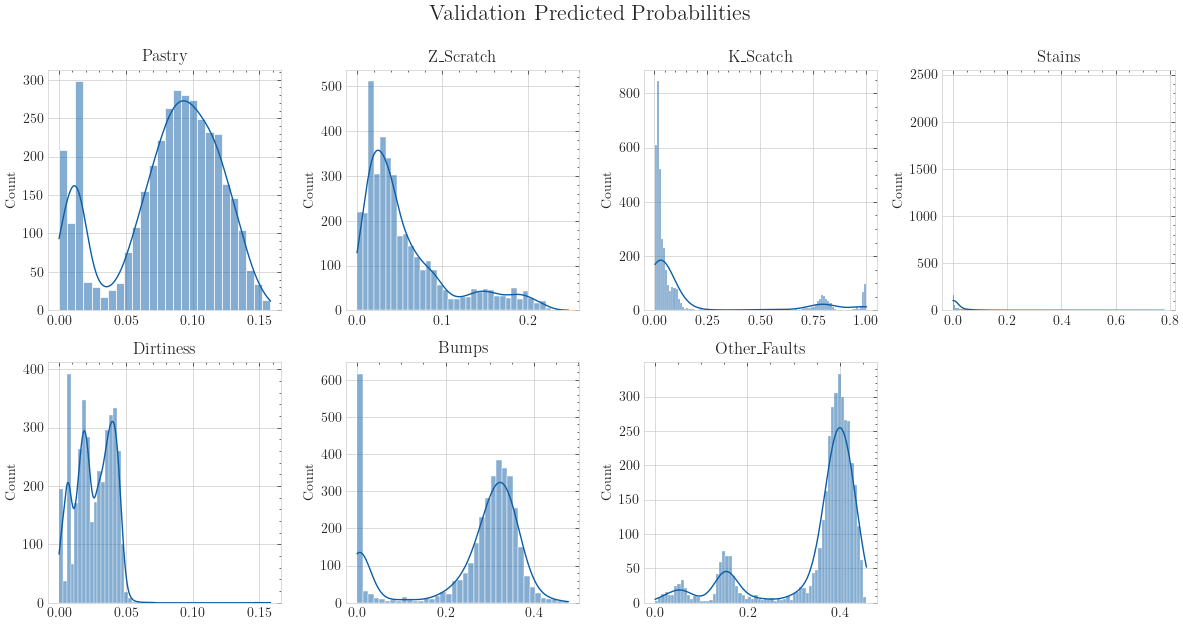

In [167]:
# plot y_pred_proba
fig, ax = plt.subplots(2,4,figsize=(12,6))
for i in range(2):
    for j in range(4):
        idx = i*4 + j
        if idx < len(targets):
            sns.histplot(y_pred_proba[:,idx], kde=True, ax=ax[i,j])
            ax[i,j].set_title(targets[idx])
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.suptitle('Validation Predicted Probabilities', y=1.05, fontsize=16)
plt.show()


## ROC AUC Curve

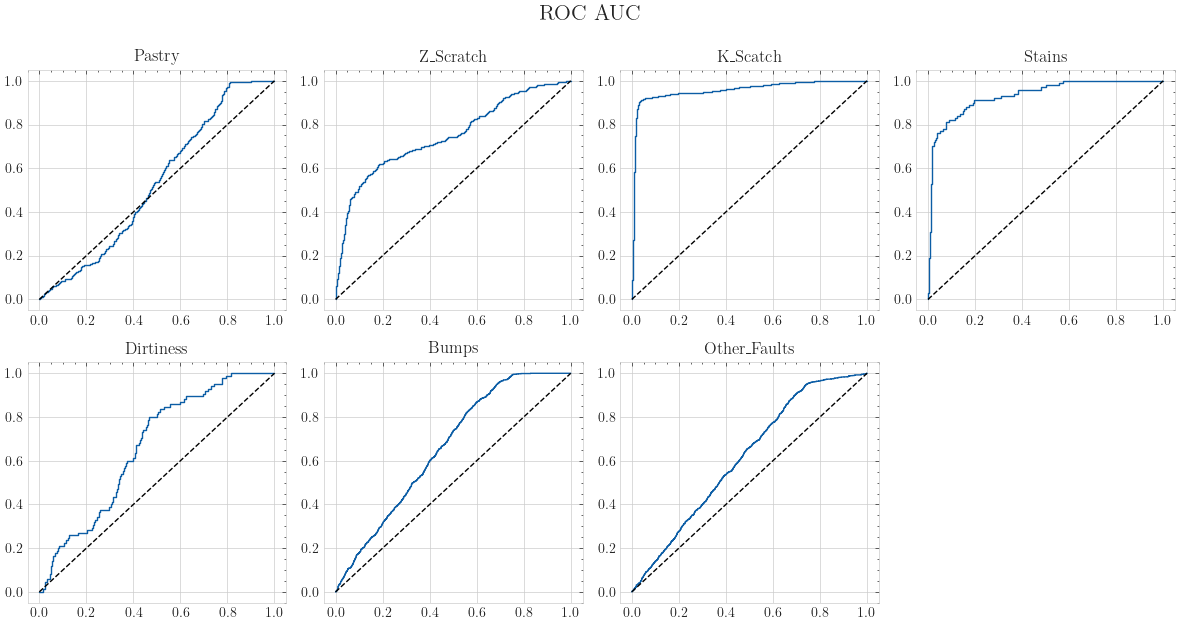

In [168]:
# plot ROC AUC
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax = plt.subplots(2,4,figsize=(12,6))
for i in range(2):
    for j in range(4):
        idx = i*4 + j
        if idx < len(targets):
            fpr, tpr, thresholds = roc_curve(y_val.iloc[:,idx], y_pred_proba[:,idx])
            ax[i,j].plot(fpr, tpr)
            ax[i,j].plot([0,1],[0,1],'k--')
            ax[i,j].set_title(targets[idx])
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.suptitle('ROC AUC', y=1.05, fontsize=16)
plt.show()

## Predictions on Test Data


In [169]:
preds = model.predict_proba(test[features])
preds.shape

(12814, 7)

In [170]:
ss[targets] = preds

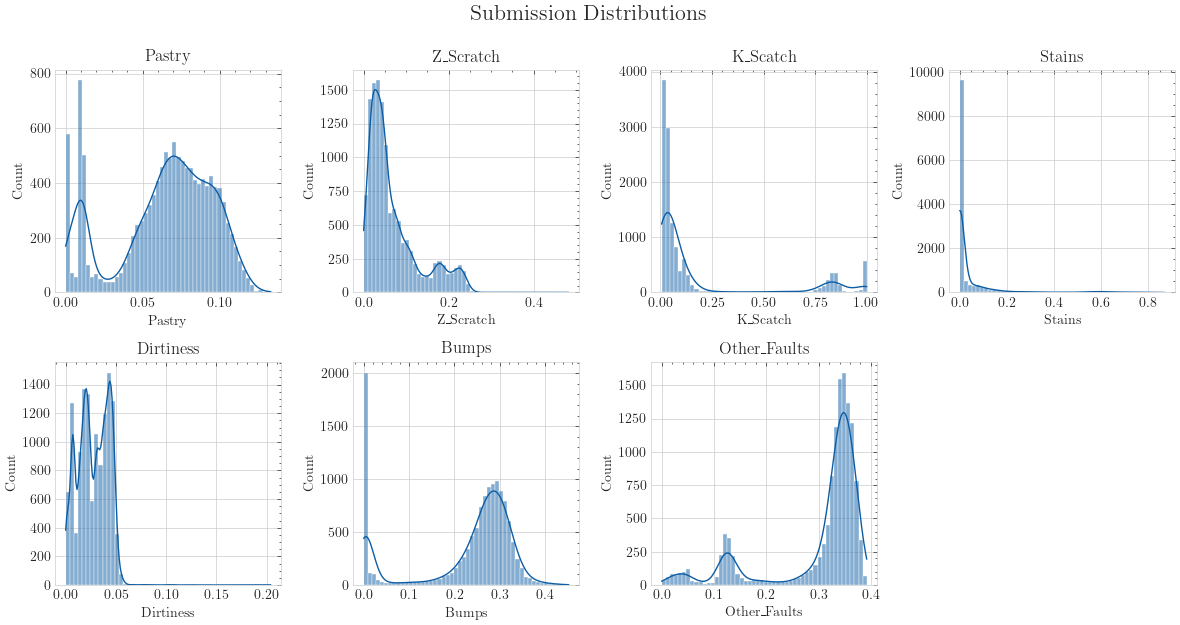

In [173]:
# plot the submission distributions in a 2x4 grid
rows = 2
cols = 4
fig, ax = plt.subplots(rows,cols,figsize=(12,6))
for i in range(rows):
    for j in range(cols):
        idx = i*cols + j
        if idx < len(targets):
            sns.histplot(ss[targets[idx]], bins=50,kde=True, ax=ax[i,j])
            ax[i,j].set_title(targets[idx])
        else:
            ax[i,j].axis('off')
plt.tight_layout()
plt.suptitle('Submission Distributions', y=1.05, fontsize=16)
plt.show()

## Save Submission

In [174]:
ss.to_csv('submission.csv', index=False)

Dirtiness and Bumps don't look right for this baseline, submit and investigate later
